## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

## Wine

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , mean_squared_error, r2_score

In [9]:
wine = datasets.load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [10]:
wine.feature_names #觀察feature

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [50]:
#取某一個feature
X_wine = wine.data[:,np.newaxis,6]
#分割train,test
X_train,X_test,y_train,y_test = train_test_split(X_wine, wine.target,test_size =0.1, random_state = 35)

In [51]:
log = linear_model.LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
y_pred=log.predict(X_test)

In [56]:
#評估metrics
accuracy = accuracy_score(y_pred, y_test)
r2 =r2_score(y_pred, y_test)
mean_sq =mean_squared_error(y_pred, y_test)
print (f'accuracy:{accuracy}, r2:{r2}, mean_suare_error:{mean_sq}')
print(f'coff:{log.coef_}')

accuracy:0.8888888888888888, r2:0.8333333333333334, mean_suare_error:0.1111111111111111
coff:[[ 1.52363258]
 [ 0.02482919]
 [-2.68965429]]


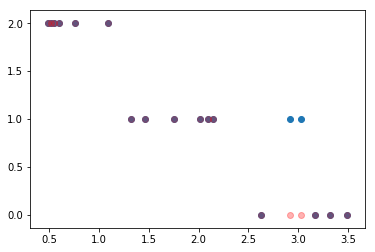

In [54]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, color='red',alpha= 0.3)

## breast_cancer

In [58]:
boston_data =datasets.load_boston()
boston_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [81]:
X = boston_data.data[:,np.newaxis,0]
X_train, X_test, y_train, y_test =train_test_split(X, boston_data.target, test_size=0.1, random_state=35)

In [70]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print (f'coeff:{regr.coef_}')

coeff:[-0.40669249]


In [75]:
pred=regr.predict(X_test)
print (f'mean_square_error:{mean_squared_error(pred,y_test)}')
print (f'r2:{r2_score(pred,y_test)}')

mean_square_error:54.939406839276735
r2:-13.629537473707485


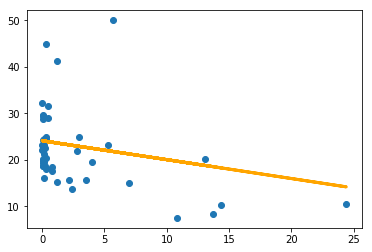

In [80]:
plt.scatter(X_test, y_test)
plt.plot(X_test, pred,color='orange',linewidth= 3)

coeff:[9.07151272]
mean_square_error:36.01293910234435
r2:-0.559089722407492


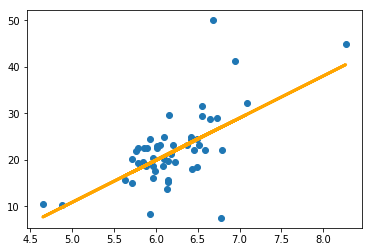

In [94]:
#找相關係數高的
X = boston_data.data[:,np.newaxis,5]
X_train, X_test, y_train, y_test =train_test_split(X, boston_data.target, test_size=0.1, random_state=35)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print (f'coeff:{regr.coef_}')

pred=regr.predict(X_test)
print (f'mean_square_error:{mean_squared_error(pred,y_test)}')
print (f'r2:{r2_score(pred,y_test)}')

plt.scatter(X_test, y_test)
plt.plot(X_test, pred,color='orange',linewidth= 3)